neighborhood
Allegheny Center     0.595828
Allegheny West       0.323701
Allentown            0.012053
Arlington            0.008134
Arlington Heights    0.005727
Banksville           0.040398
Bedford Dwellings    0.029208
Beechview            0.025292
Beltzhoover          0.016332
Bloomfield           0.068734
Name: tree_area_feet, dtype: float64

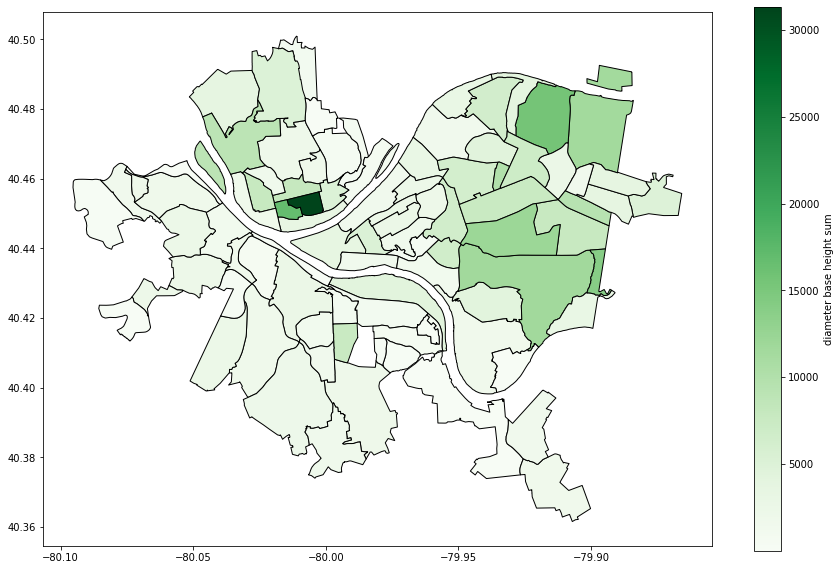

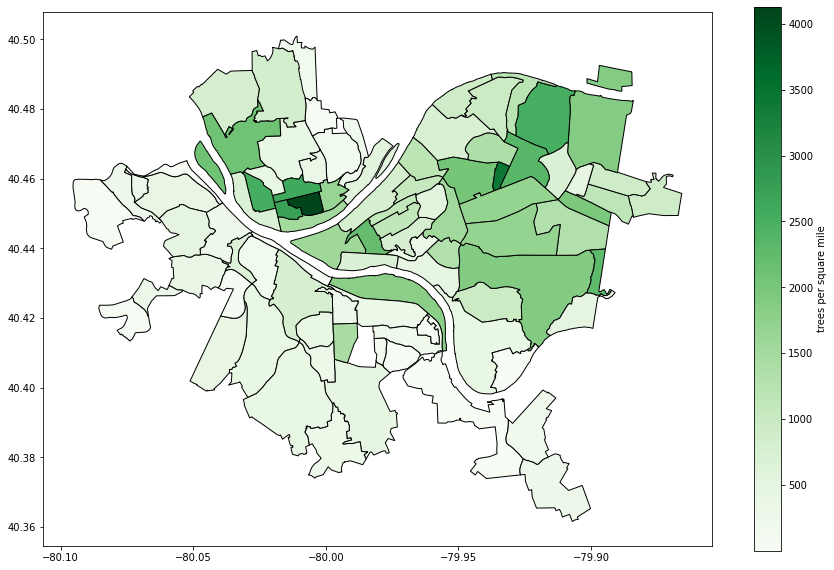

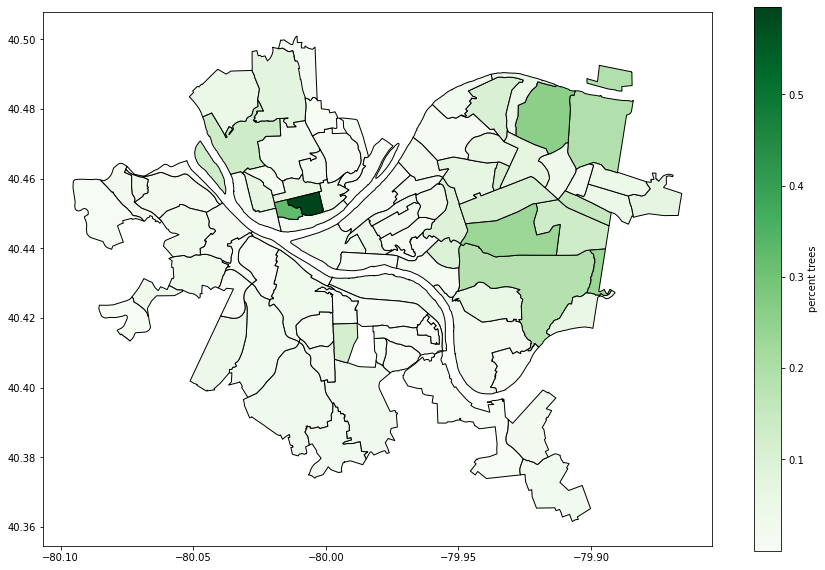

In [6]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline

trees = pd.read_csv("trees.csv", low_memory=False)
# filter to important info
trees['num'] =1
tree_den = trees.groupby("neighborhood").sum()['diameter_base_height']
num_trees = trees.groupby("neighborhood").sum()['num']
num_trees.sort_values(ascending=False)
tree_den.sort_values(ascending=False)
#print(num_trees)
#tree_den = num_trees
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
#neighborhoods.plot() # plot the geopandas dataframe
nbhds = geopandas.read_file("Neighborhoods/Neighborhoods_.dbf") 
#nbhds.plot() # plot the geopandas dataframe
sqmiles = nbhds.groupby('hood').sum()['sqmiles']
sqmiles['Perry North'] = 1.212

trees['tree_area_feet'] = ((((trees['diameter_base_height']/2.54)/2)**2)* 3.14159)/144
#trees['tree_area'] = trees['tree_area'] / 144
tree_area_sum = trees.groupby("neighborhood").sum()['tree_area_feet']



sqfeet = sqmiles * 3057.4132457
#print("thiss miless\n" , sqmiles)
#print("thisss\n" ,sqfeet)
#print("this\n" ,tree_area_feet)

percent_tree =  tree_area_sum /sqfeet 
#print(percent_tree)
for index, value in num_trees.items():
    num_trees[index] = (num_trees[index]*10)/(sqmiles[index] *10)

for index, value in tree_den.items():
    tree_den[index] = ((tree_den[index]/2.54)*10)/(sqmiles[index] *10)

for index, value in tree_area_sum.items():
    tree_area_sum[index] = tree_area_sum[index]/sqfeet[index]
    
num_trees.sort_values(ascending=False)
tree_den.sort_values(ascending=False)
#print(type(num_trees))
#print(type(percent_tree))
percent_tree.sort_values(ascending = False)
#print(num_trees)
num_trees_map = neighborhoods.merge(num_trees, how='left', left_on='hood', right_on='neighborhood')
tree_den_map = neighborhoods.merge(tree_den, how='left', left_on='hood', right_on='neighborhood')
percent_tree_map = neighborhoods.merge(tree_area_sum, how='left', left_on='hood', right_on='neighborhood')

#trees_map.plot(column='diameter_base_height')
tree_den_map.plot(column='diameter_base_height', # set the data to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "diameter base height sum"}, # label the legend
                figsize = (15,10)# set the size
                # set disctricts with no data to gray
               )
num_trees_map.plot(column='num', # set the data to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "trees per square mile"}, # label the legend
               figsize = (15,10)    # set the size
                # set disctricts with no data to gray
               )
percent_tree_map.plot(column='tree_area_feet', # set the data to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "percent trees"}, # label the legend
               figsize = (15,10),# set the size
                # set disctricts with no data to gray
               )

tree_area_sum.head(10)
#print(trees['diameter_base_height'].mean())

Lets start out by importing some helpful tools 

In [ ]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline

Cool, the next thing we should do is import our trees file and read it

In [ ]:
trees = pd.read_csv("trees.csv", low_memory=False)

Next I want to sum how many trees are in each neighborhood so I add a value of 1 to each individual tree then group them by neighborhood and sum the values.

In [ ]:
trees['num'] =1
num_trees = trees.groupby("neighborhood").sum()['num']
num_trees.sort_values(ascending=False)

After this we need to get some additional information about the neighborhoods so lets read some more files

In [8]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
nbhds = geopandas.read_file("Neighborhoods/Neighborhoods_.dbf") 

Okay awesome now we have access to information about the neighborhoods and their shape, so lets see how big each area is

In [ ]:
sqmiles = nbhds.groupby('hood').sum()['sqmiles']
#perry was not in data so we add it ourselves 
sqmiles['Perry North'] = 1.212
sqfeet = sqmiles * 3057.4132457

Now we want to see how many trees there are per square mile of a given neighborhood and we can do so like this:

In [ ]:
for index, value in num_trees.items():
    num_trees[index] = (num_trees[index]*10)/(sqmiles[index] *10)

Okay awesome now lets plot this data 

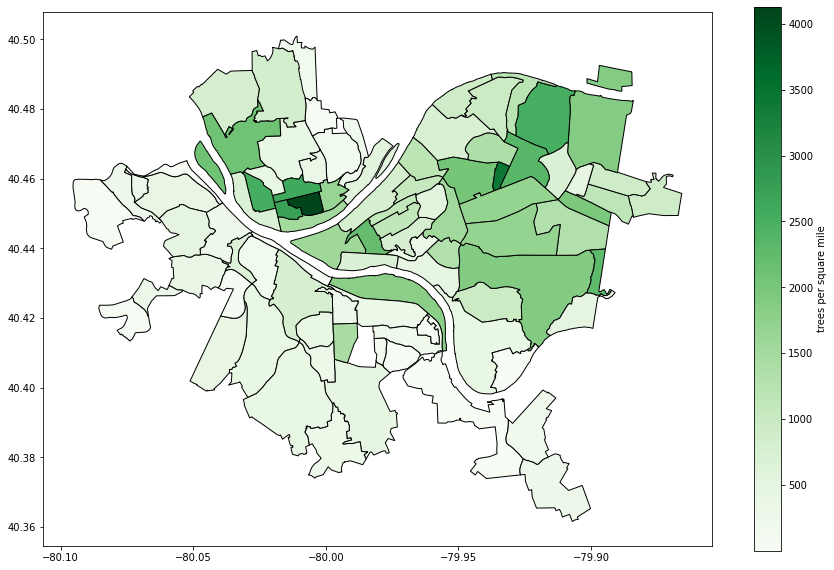

In [9]:
num_trees.sort_values(ascending=False)
num_trees_map = neighborhoods.merge(num_trees, how='left', left_on='hood', right_on='neighborhood')
num_trees_map.plot(column='num', # set the data to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "trees per square mile"}, # label the legend
               figsize = (15,10)    # set the size
                # set disctricts with no data to gray
               )

Okay this is pretty cool, but is the number of trees really the only relvant metric? Lets look at the size of these trees

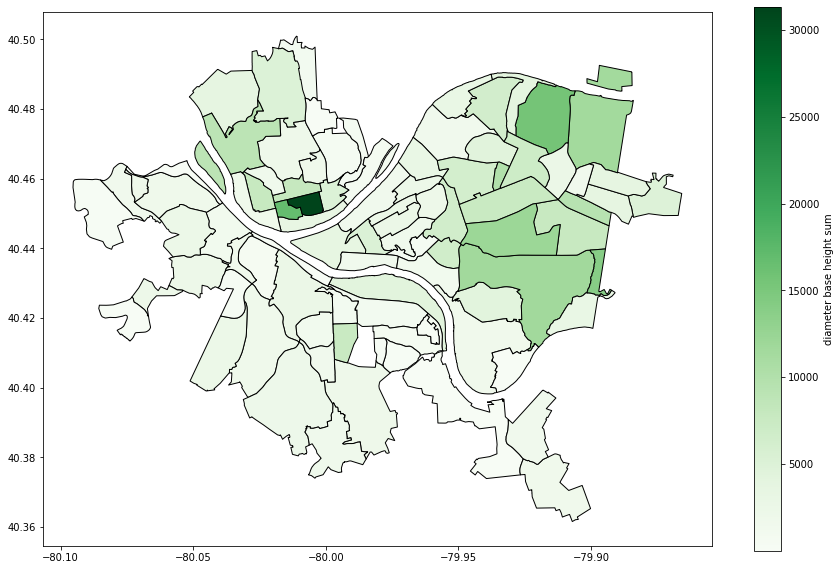

In [10]:
tree_den = trees.groupby("neighborhood").sum()['diameter_base_height']
tree_den.sort_values(ascending=False)
for index, value in tree_den.items():
    tree_den[index] = ((tree_den[index]/2.54)*10)/(sqmiles[index] *10)
tree_den.sort_values(ascending=False)
tree_den_map = neighborhoods.merge(tree_den, how='left', left_on='hood', right_on='neighborhood')
tree_den_map.plot(column='diameter_base_height', # set the data to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "diameter base height sum"}, # label the legend
                figsize = (15,10)# set the size
                # set disctricts with no data to gray
               )

Well, that looks good, but I dont think summing the total diameters of all the trees in a neighborhood is the best metric, so lets finish this by calculating the area of all the trees in a neighborhood relative to the area of that neighborhood

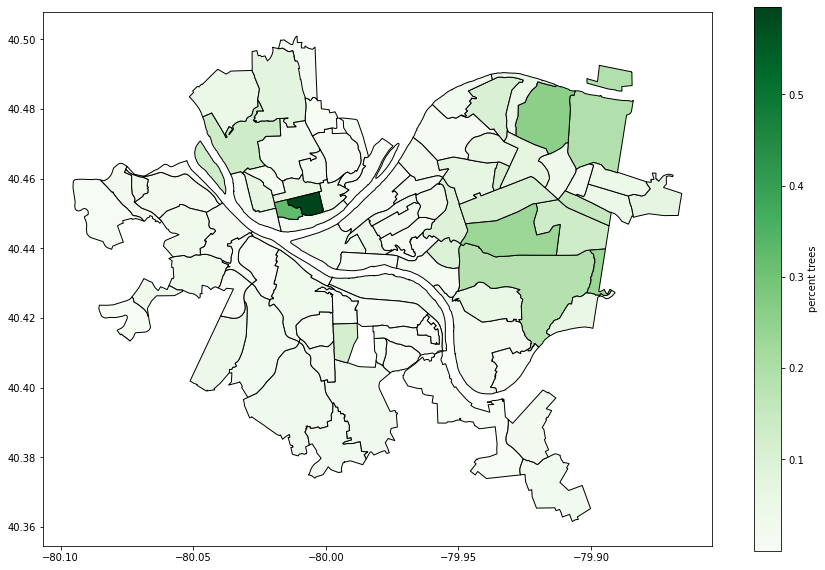

In [11]:
trees['tree_area_feet'] = ((((trees['diameter_base_height']/2.54)/2)**2)* 3.14159)/144
tree_area_sum = trees.groupby("neighborhood").sum()['tree_area_feet']
percent_tree =  tree_area_sum /sqfeet 
for index, value in tree_area_sum.items():
    tree_area_sum[index] = tree_area_sum[index]/sqfeet[index]
percent_tree.sort_values(ascending = False)
percent_tree_map = neighborhoods.merge(tree_area_sum, how='left', left_on='hood', right_on='neighborhood')
percent_tree_map.plot(column='tree_area_feet', # set the data to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "percent trees"}, # label the legend
               figsize = (15,10),# set the size
                # set disctricts with no data to gray
               )

okay this is awesome lets normaizle this so we can combine it with other data

In [18]:
# copy the data
df_max_scaled = tree_area_sum.copy()

# apply normalization techniques on Column 1_
#column = ''
df_max_scaled[1] = df_max_scaled[1] /df_max_scaled[1].max()
display(df_max_scaled)


neighborhood
Allegheny Center       0.595828
Allegheny West         1.000000
Allentown              0.012053
Arlington              0.008134
Arlington Heights      0.005727
                         ...   
Upper Lawrenceville    0.027311
West End               0.014492
West Oakland           0.005050
Westwood               0.033338
Windgap                0.022580
Name: tree_area_feet, Length: 90, dtype: float64